In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
#Check version of sns
print(sns.__version__)

0.13.2


In [3]:
df = pd.read_csv("EPL_Soccer_MLR_LR.csv")

In [4]:
df.head()

,PlayerName,Club,DistanceCovered(InKms),Goals,MinutestoGoalRatio,ShotsPerGame,AgentCharges,BMI,Cost,PreviousClubCost,Height,Weight,Score
0,"Braund, Mr. Owen Harris",MUN,3.96,7.5,37.5,12.3,60,20.56,109.1,63.32,195.9,78.9,19.75
1,"Allen, Mr. William Henry",MUN,4.41,8.3,38.2,12.7,68,20.67,102.8,58.55,189.7,74.4,21.30
2,"Moran, Mr. James",MUN,4.14,5.0,36.4,11.6,21,21.86,104.6,55.36,177.8,69.1,19.88
3,"McCarthy, Mr. Timothy J",MUN,4.11,5.3,37.3,12.6,69,21.88,126.4,57.18,185.0,74.9,23.66
4,"Palsson, Master. Gosta Leonard",MUN,4.45,6.8,41.5,14.0,29,18.96,80.3,53.20,184.6,64.6,17.64


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202 entries, 0 to 201
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   PlayerName              202 non-null    object 
 1   Club                    202 non-null    object 
 2   DistanceCovered(InKms)  202 non-null    float64
 3   Goals                   202 non-null    float64
 4   MinutestoGoalRatio      202 non-null    float64
 5   ShotsPerGame            202 non-null    float64
 6   AgentCharges            202 non-null    int64  
 7   BMI                     202 non-null    float64
 8   Cost                    202 non-null    float64
 9   PreviousClubCost        202 non-null    float64
 10  Height                  202 non-null    float64
 11  Weight                  202 non-null    float64
 12  Score                   202 non-null    float64
dtypes: float64(10), int64(1), object(2)
memory usage: 20.6+ KB


In [6]:
df.describe()

,DistanceCovered(InKms),Goals,MinutestoGoalRatio,ShotsPerGame,AgentCharges,BMI,Cost,PreviousClubCost,Height,Weight,Score
count,202.000000,202.000000,202.000000,202.000000,202.000000,202.000000,202.000000,202.000000,202.000000,202.000000,202.000000
mean,4.718614,7.108663,43.091584,14.566337,76.876238,22.955891,69.021782,64.873713,180.103960,75.008168,13.507426
std,0.457976,1.800549,3.662989,1.362451,47.501239,2.863933,32.565333,13.070197,9.734494,13.925574,6.189826
min,3.800000,3.300000,35.900000,11.600000,8.000000,16.750000,28.000000,34.360000,148.900000,37.800000,5.630000
25%,4.372500,5.900000,40.600000,13.500000,41.250000,21.082500,43.850000,54.667500,174.000000,66.525000,8.545000
50%,4.755000,6.850000,43.500000,14.700000,65.500000,22.720000,58.600000,63.035000,179.700000,74.400000,11.650000
75%,5.030000,8.275000,45.575000,15.575000,97.000000,24.465000,90.350000,74.750000,186.175000,84.125000,18.080000
max,6.720000,14.300000,59.700000,19.200000,234.000000,34.420000,200.800000,106.000000,209.400000,123.200000,35.520000


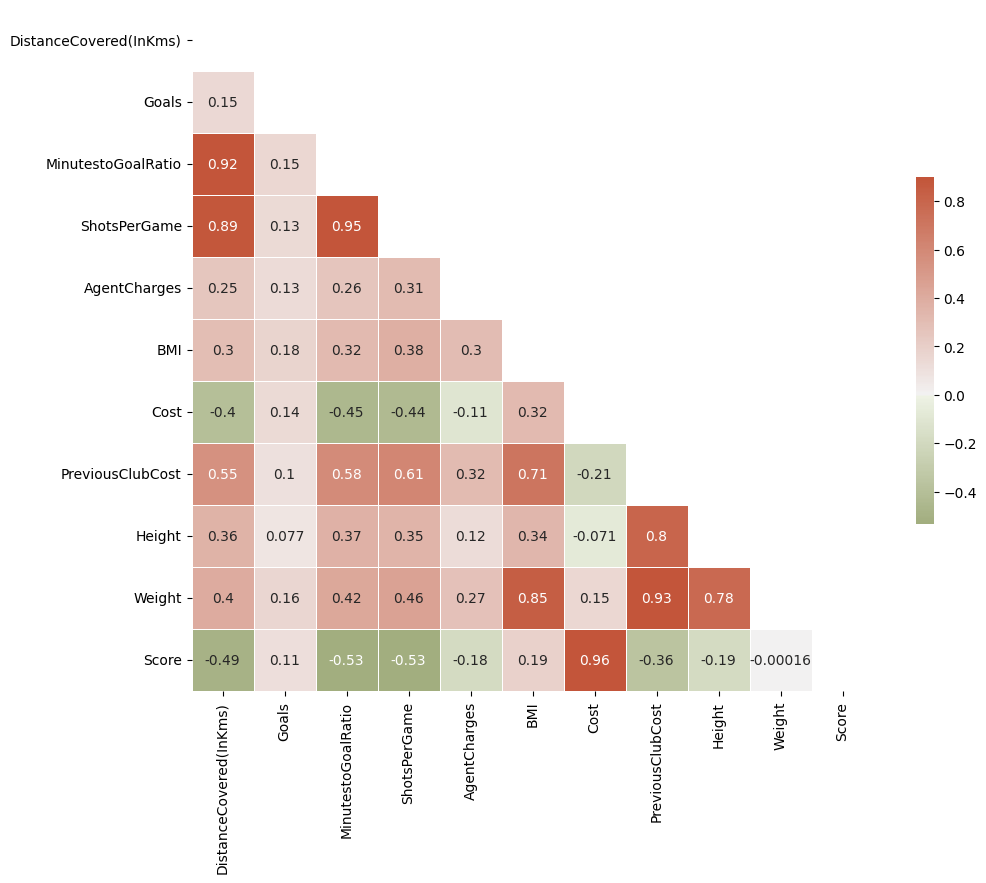

In [7]:
#find correlation between all variables where datatype is int64 or float64
numeric_df = df.select_dtypes(include=['int64','float64'])
correlation = numeric_df.corr()
# plot a heatmap to visualize the correlation
mask = np.triu(np.ones_like(correlation, dtype=bool))
plt.figure(figsize=(11, 9))
cmap = sns.diverging_palette(100, 20, as_cmap=True)
sns.heatmap(correlation, mask = mask, cmap=cmap, vmax=.9, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot=True)

plt.show()

## Linear Regression

In [8]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
import statsmodels.api as sm

In [9]:
#split the data into training and testing sets
x=df['Cost']
y=df['Score']
x_train_with_intercept = sm.add_constant(x, prepend=False)
x_train, x_test, y_train, y_test = train_test_split(x_train_with_intercept, y, train_size=0.75, test_size=0.25, random_state=100)

In [10]:
print(f'x.max()', x.max()
        , f'\nx.min()', x.min()
        , f'\ny.max()', y.max()
        , f'\ny.min()', y.min()
        , f'\nx_train.shape', x_train.shape
        , f'\ny_train.shape', y_train.shape
        , f'\nx_test.shape', x_test.shape
        , f'\ny_test.shape', y_test.shape)

x.max() 200.8 
x.min() 28.0 
y.max() 35.52 
y.min() 5.63 
x_train.shape (151, 2) 
y_train.shape (151,) 
x_test.shape (51, 2) 
y_test.shape (51,)


In [11]:
x_train

,Cost,const
52,181.7,1.0
74,131.9,1.0
28,74.7,1.0
29,113.5,1.0
89,109.0,1.0
...,...,...
87,46.1,1.0
103,50.9,1.0
67,49.9,1.0
24,76.2,1.0


In [12]:
#fit the model on training data
lr = sm.OLS(y_train, x_train, hasconst=True).fit()
lr.params


Cost     0.182083
const    0.947185
dtype: float64

In [13]:
lr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Score   R-squared:                       0.930
Model:                            OLS   Adj. R-squared:                  0.929
Method:                 Least Squares   F-statistic:                     1976.
Date:                Tue, 19 Mar 2024   Prob (F-statistic):           6.91e-88
Time:                        15:39:35   Log-Likelihood:                -293.23
No. Observations:                 151   AIC:                             590.5
Df Residuals:                     149   BIC:                             596.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Cost           0.1821      0.004     44.456      0.000       0.174       0.190
const          0.9472      0.325      2.916      0.004       0.305       1.589
==============================================================================
Omnibus:                        3.849   Durbin-Watson:                   1.821
Prob(Omnibus):                  0.146   Jarque-Bera (JB):                3.867
Skew:                           0.359   Prob(JB):                        0.145
Kurtosis:                       2.685   Cond. No.                         186.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

* The R-squared value is 93%. This means that 93% of the variation in the response/dependant variable (score) can be explained using predictor/independant variable (cost). 
* Probability of F-statistic is also very low, which is good. 
* The intercept term ( alpha) is positive ( 0.9472)
* The intercept term is statistically significant looking at the p value based on the t score (0.004)
* The cost is 0.1821. This means for every one unit increase in cost, we can expect an increase in score by 0.18
* The cost is also statistically significant based on the p value(0.000 )

bo: 0.9471853461853139
b1: 0.1820826462600255


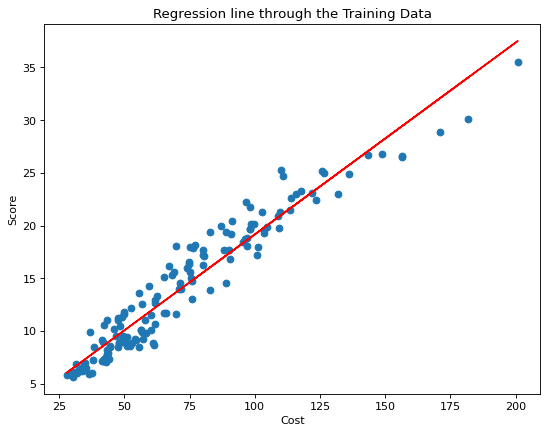

In [14]:
#Extract the beta0 and beta1 values
b0=lr.params['const']
b1=lr.params['Cost']
print(f'bo: {b0}')
print(f'b1: {b1}')

#Plot the fitted line on training data
plt.figure(figsize=(8, 6), dpi=80)
plt.scatter(x_train['Cost'], y_train)

plt.plot(x_train['Cost'], b0+ b1*x_train['Cost'], 'r')
plt.xlabel("Cost")
plt.ylabel("Score")
plt.title("Regression line through the Training Data")

plt.show()

Once the cost is more than 150, the model tends to overestimate how much the player scores. Perhaps the league is overpaying some players? But it looks like pretty much all players above 150 are scoring well(Between 25 and 35). 

#### Predicting on test data

In [15]:
#Prediction on test data
y_pred_test = lr.predict(x_test)



In [16]:
y_pred_test

140     7.156204
101     8.558240
31     15.568422
88      9.377612
183    20.193321
133     9.741777
169     7.793493
127    15.149632
195    14.730842
174     6.573539
154     6.591747
179     9.923860
128     8.376157
46     13.692971
125    10.561149
65     10.506524
164     8.030200
120    10.779648
177    21.613566
104     8.321533
119     9.049863
77      9.359404
96      8.867780
156     7.083371
81      8.430782
11     14.931133
73     19.665281
75      7.101579
15     19.137242
153     6.883080
110    10.415483
99     11.671853
122    12.764349
157     6.464290
41     20.411820
85     10.888898
59     10.888898
160     7.775285
175    10.561149
3      23.962432
165     9.104488
196    11.453354
32     20.885235
64     12.400184
26     21.176567
197    13.183139
115     9.414028
170     6.719205
161    21.431483
118     9.705361
7      18.773076
dtype: float64

In [17]:
y_test

140     6.06
101     7.68
31     17.51
88     10.74
183    19.17
133     8.51
169     6.92
127    11.95
195    13.49
174     6.53
154     5.93
179     9.86
128     7.35
46     15.01
125     8.97
65     11.85
164     7.52
120    10.81
177    17.41
104     6.86
119     9.36
77     12.39
96     10.16
156     6.56
81      9.02
11     18.08
73     19.51
75      8.07
15     19.83
153     6.20
110     8.44
99     13.46
122     9.53
157     6.76
41     21.32
85     12.16
59     11.47
160     7.72
175     9.40
3      23.66
165     9.56
196    10.25
32     23.70
64     12.78
26     23.70
197    11.79
115     9.03
170     6.33
161    19.94
118     9.56
7      22.43
Name: Score, dtype: float64

In [18]:
y_test.shape

(51,)

Text(0.5, 1.0, 'Regression line through the Test Data')

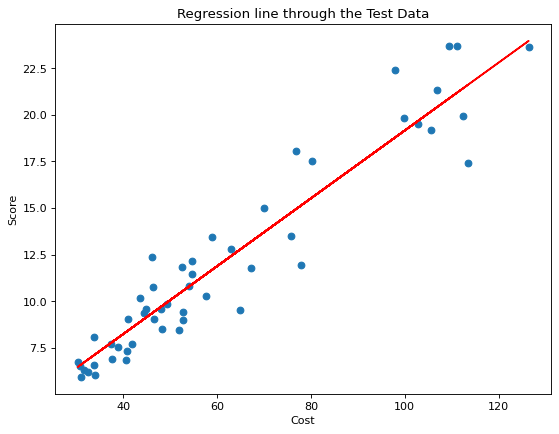

In [19]:
#Plot scatter plot of test data and the regression line

plt.figure(figsize=(8, 6), dpi=80)
plt.scatter(x_test['Cost'], y_test)
plt.plot(x_test['Cost'],y_pred_test , 'r')
plt.xlabel("Cost")
plt.ylabel("Score")
plt.title("Regression line through the Test Data")

Points on the red line will be the predicted score values whereas the blue points are the actual score values. The test data points seem to spread evenly above and below the line. The model is confident in predicting scores upto 120 in cost. INcrease in cost after 120, and the model is not confident in predicting the score.

#### Diagnostics and Remedies

Are our assumptions of a linear model actually holding true? Let's access that using the following checklist:

* NON-LINEARITY
* NON-CONSTANT VARIANCE
* DEVIATIONS FROM NORMALITY
* ERRORS NOT IID
* OUTLIERS
* MISSING PREDICTORS

We use RESIDUAL ANALYSIS on the training data to verify the points in the checklist 

Text(0.5, 1.0, 'Residue on Training Data')

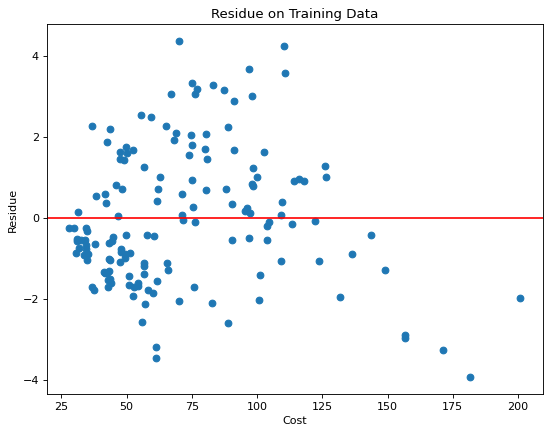

In [20]:
#Residual v/s Predictor plot on training data
y_pred_train = lr.predict(x_train)

residue_train = y_train - y_pred_train

plt.figure(figsize=(8, 6), dpi=80)
plt.scatter(x_train['Cost'], residue_train)
plt.axhline(y=0, color='r', linestyle='-')
plt.xlabel("Cost")
plt.ylabel("Residue")
plt.title("Residue on Training Data")


* The residuals vs cost plot shows a good scatter of residuals and no heteroscadasticity pattern is observed up until 125 or 150 costs. So linear regression seems to be a good model. 

Text(0.5, 1.0, 'Absolute Residue on Training Data')

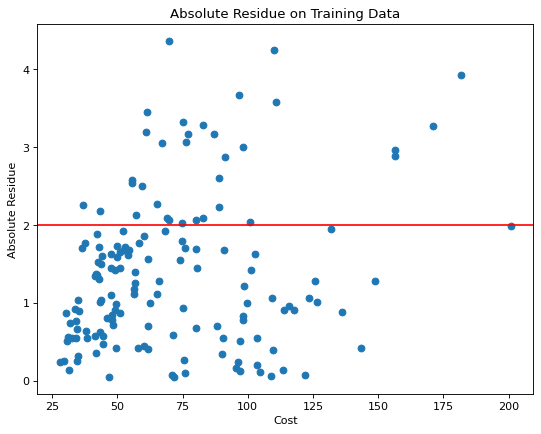

In [21]:
#Absolute Residual v/s Predictor plot on training data
abs_residue_train = abs(residue_train)

plt.figure(figsize=(8, 6), dpi=80)
plt.scatter(x_train['Cost'], abs_residue_train)
plt.axhline(y=2, color='r', linestyle='-')
plt.xlabel("Cost")
plt.ylabel("Absolute Residue")
plt.title("Absolute Residue on Training Data")


What do I make out of this graph?

((array([-2.60603471, -2.28639722, -2.10324767, -1.97158309, -1.867224  ,
         -1.7799545 , -1.70445293, -1.63757876, -1.57731662, -1.52229259,
         -1.47152616, -1.42429196, -1.3800376 , -1.33833223, -1.29883298,
         -1.26126233, -1.22539231, -1.19103324, -1.1580255 , -1.12623343,
         -1.09554071, -1.06584677, -1.03706405, -1.0091158 , -0.98193434,
         -0.95545967, -0.92963831, -0.90442237, -0.87976879, -0.85563868,
         -0.83199678, -0.80881102, -0.78605212, -0.76369328, -0.74170987,
         -0.7200792 , -0.69878032, -0.67779383, -0.65710172, -0.6366872 ,
         -0.61653466, -0.59662946, -0.57695791, -0.55750713, -0.53826504,
         -0.51922023, -0.50036191, -0.48167989, -0.4631645 , -0.44480656,
         -0.42659733, -0.40852846, -0.39059201, -0.37278035, -0.35508619,
         -0.33750252, -0.32002258, -0.3026399 , -0.28534819, -0.26814138,
         -0.25101361, -0.23395916, -0.2169725 , -0.20004822, -0.18318105,
         -0.16636584, -0.14959754, -0.

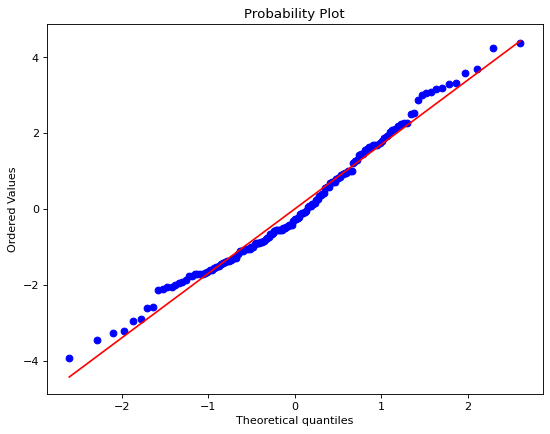

In [23]:
#Normality plot
import scipy
import scipy.stats as stats

plt.figure(figsize=(8, 6), dpi=80)
scipy.stats.probplot(residue_train,plot=plt)

Points are as close to the red line. The points are normally distributed. For linear regressin, one assumption is that the data is normally distributed. If not, we'd either do data transformation or we use a different model.

Text(0.5, 1.0, 'Histogram of Residue')

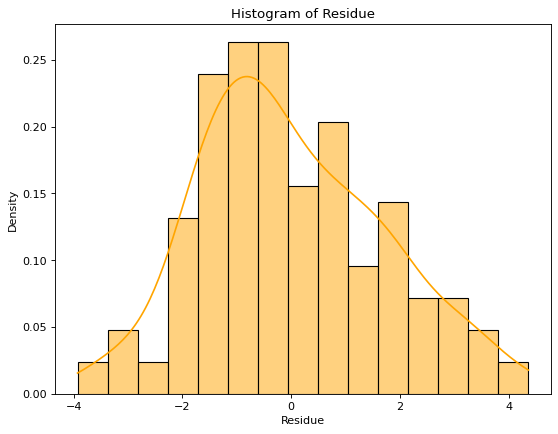

In [48]:
#Evaluate normality through histogram of residuals
plt.figure(figsize=(8, 6), dpi=80)
#plt.hist(residue_train, bins=20, edgecolor='black')
sns.histplot(residue_train, kde=True, bins=15, color='orange', stat='density')
#sns.distplot(residue_train, kde=True, bins=15, color='orange')
plt.xlabel("Residue")
plt.ylabel("Density")
plt.title("Histogram of Residue")


The normality of the errors can be seen in the normal probability plot and the histogram. It is more or less normal or bell shaped is what Project Pro says. I found it to be right skewed. SO should we do a standard normal distribution even if it's slightly skewed?

Text(0.5, 1.0, 'Boxplot of Residue')

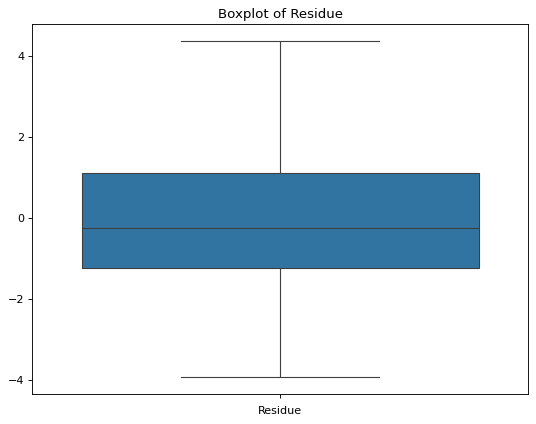

In [42]:
#Residual boxplot
plt.figure(figsize=(8, 6), dpi=80)
sns.boxplot(residue_train)
plt.xlabel("Residue")
plt.title("Boxplot of Residue")


There are no obvious outliers indicated.